# 1.0 Overview
Urbanization is when people move from rural places to cities. This is seen as a rise in the proportion of people who live in cities and towns.
Urbanization, however, affects various aspects of human society. These include socio-economic factors such as GDP, population growth rates, healthcare access, employment opportunities and development. In Kenya, urbanization has influenced the socio-economic factors aforementioned.

## 1.1 Research Questions
* What is the effect of urbanization on GDP Kenya?
* What is the trend of GDP with the increasing urbanization in Kenya?
* What does urbanization mean for development in Kenya?
* How has urbanization influenced healthcare access in Kenya?
* How has urbanization influenced unemployment in Kenya?

## 1.2 Objectives
* Determine the effect that urbanization has had on the GDP of Kenya.
* Find the trend of GDP with the increase in urbanization in Kenya.
* Determine what urbanization has done to development in Kenya.
* Determine the influence that urbanization has had on healthcare access in Kenya.
* Determine the influence of urbanization on unemployment in Kenya.

# 2.0 Data Understanding
The study will use open-source data in order to investigate the influence urbanization has had on the Kenyan society. The data to be used include data on gdp, healthcare, unemployment, urban and rural population.

In [1]:
# load dependencies
import pandas as pd
import numpy as np
# import ee
# import geemap
# import folium
# import geopandas as gpd
# import geopy as gpy
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# ke_urban_target_path = 'src/data/ke_urbanareas/ke_urbanareas.shp'
# ke_major_towns_path = 'src/data/ke_major-towns/ke_major-towns.shp'
# base_dir = '/home/teofilo_acholla_ligawa_gafna/Documents/python_practice/collaborations/dte_datathon/'
# ke_urban_file_path = base_dir+ke_urban_target_path

# # read the urban and major towns files
# ke_urban_shapefile = gpd.read_file(ke_urban_file_path)

# ke_urban_shapefile

In [4]:
# # plot urban areas in Kenya

# # Create a Folium map centered on Kenya
# m = folium.Map(location=[-1.2921, 36.8219], zoom_start=6)

# # Define a style function to set the color
# def style_function(feature):
#     return {
#         'fillColor': 'yellow',  # Change this color to your desired color
#         'color': 'red',
#         'weight': 2,
#         'fillOpacity': 0.7,
#     }

# # Add the GeoJSON data to the map with the style_function
# folium.GeoJson(
#     ke_urban_shapefile,
#     style_function=style_function,
# ).add_to(m)

# # show map
# m

The region of interest is Kenya and the map is centered around it. The blue marks indicate the urban areas of the country. From the map we realize that the urban areas in Kenya are not well spread out, they ar sparse towards the eastern, southern and northern part of the country. The urban areas in the country are mostly centrally located and a good number is seen towards the western part of the country.

In [5]:
# # save the map
# m.save(base_dir+'src/data/ke_urbanareas/kenyan_urbanareas_folium_map.html')

## 2.1 Preliminary Data Inspection
> In this phase of the study, we shall inspect the data about the data.

In [6]:
# load data
df1 = pd.read_csv('/home/user/datathon/dte_datathon/src/data/agriculture-electricity-health.csv')
df2 = pd.read_csv('/home/user/datathon/dte_datathon/src/data/gdp-population-rural.csv')
unemp =pd.read_csv('/home/user/datathon/dte_datathon/src/data/kenya-unemployment-rate.csv')

# preview
df1.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,access_to_electricity_rural_%_of_rural_population,access_to_electricity_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population,access_to_clean_fuels_and_technologies_for_cooking_%_of_population,adolescents_out_of_school_%_of_lower_secondary_school_age,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,"hospital_beds_per_1,000_people",literacy_rate_adult_total_%_of_people_ages_15_and_above,"physicians_per_1,000_people"
0,1960,..,..,..,..,..,..,..,..,..,..,1.25048005580902,..,0.092
1,1961,44.2773307094915,..,..,..,..,..,..,..,..,..,..,..,..
2,1962,44.2861158941561,..,..,..,..,..,..,..,..,..,..,..,..
3,1963,44.2949010788207,..,..,..,..,..,..,..,..,..,..,..,..
4,1964,44.3036862634853,..,..,..,..,..,..,..,..,..,..,..,..


In [7]:
# preview df2
df2.head()

,time,forest_area_%_of_land_area,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,urban_land_area_sq_km,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_density_people_per_sq_km_of_land_area,population_growth_annual_%,unemployment_total_%_of_total_labor_force,gdp_growth_annual_%,gdp_current_US$,current_health_expenditure_%_of_gdp,domestic_general_government_health_expenditure_%_of_current_health_expenditure,domestic_general_government_health_expenditure_%_of_gdp,proportion_of_population_pushed_below_the_$2.15_$_2017_PPP_poverty_line_by_out_of_pocket_health_care_expenditure_%
0,1960,..,7.362,..,570661,..,7180774,92.638,..,..,..,..,..,7.912655e+08,..,..,..,..
1,1961,..,7.565,6.46796851804438,608791,..,7438679,92.435,3.52861026239367,14.1397020065362,3.74797688027386,..,-7.77463490371655,7.929595e+08,..,..,..,..
2,1962,..,7.774,6.57819145208457,650185,..,7713393,92.226,3.62648892733818,14.6951154373265,3.85285696473711,..,9.45735874072126,8.681114e+08,..,..,..,..
3,1963,..,8.038,7.25096775695646,699081,..,7998119,91.962,3.62482204432135,15.2813016129599,3.91148088133147,..,8.77834021621184,9.265893e+08,..,..,..,..
4,1964,..,8.318,7.37167699069845,752562,..,8294825,91.682,3.6425437339829,15.8965931053871,3.94748519609761,..,4.96446728844091,9.987593e+08,..,..,..,..


In [8]:
# preview unemployment
unemp.head()

,time,unemployment_rate_%,annual_unemp_change_%,
0,1991-12-31,3.276,NaN,NaN
1,1992-12-31,3.288,0.01,NaN
2,1993-12-31,3.256,-0.03,NaN
3,1994-12-31,3.210,-0.05,NaN
4,1995-12-31,3.171,-0.04,NaN


In [9]:
# metadata of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   time                                                                            63 non-null     int64 
 1   agricultural_land_%_of_land_area                                                63 non-null     object
 2   access_to_electricity_%_of_population                                           63 non-null     object
 3   access_to_electricity_rural_%_of_rural_population                               63 non-null     object
 4   access_to_electricity_urban_%_of_urban_population                               63 non-null     object
 5   access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population  63 non-null     object
 6   access_to_clean_fuels_and_te

In [10]:
# metadata of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   time                                                                                                                63 non-null     int64  
 1   forest_area_%_of_land_area                                                                                          63 non-null     object 
 2   urban_population_%_of_total_population                                                                              63 non-null     float64
 3   urban_population_growth_annual_%                                                                                    63 non-null     object 
 4   urban_population      

In [11]:
# metadata for unemp
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time                   32 non-null     object 
 1   unemployment_rate_%    32 non-null     float64
 2   annual_unemp_change_%  31 non-null     float64
 3                          0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


In [12]:
# summary statistics of df1
df1.describe()

,time
count,63.000000
mean,1991.000000
std,18.330303
min,1960.000000
25%,1975.500000
50%,1991.000000
75%,2006.500000
max,2022.000000


In [13]:
# summary statistics of df2
df2.describe()

,time,urban_population_%_of_total_population,urban_population,rural_population,rural_population_%_of_total_population,gdp_current_US$
count,63.000000,63.000000,6.300000e+01,6.300000e+01,63.000000,6.300000e+01
mean,1991.000000,17.607460,5.470449e+06,2.089601e+07,82.392540,2.318447e+10
std,18.330303,6.077777,4.375918e+06,9.781360e+06,6.077777,3.129172e+10
min,1960.000000,7.362000,5.706610e+05,7.180774e+06,70.998000,7.912655e+08
25%,1975.500000,13.208500,1.833618e+06,1.204347e+07,77.767500,3.366944e+09
50%,1991.000000,17.043000,4.076385e+06,1.984185e+07,82.957000,8.209121e+09
75%,2006.500000,22.232500,8.334010e+06,2.914701e+07,86.791500,2.889185e+10
max,2022.000000,29.002000,1.566905e+07,3.835844e+07,92.638000,1.134200e+11


In [14]:
# check duplicates
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(unemp.duplicated().sum())


# missing values
print(f"df1 :\n {df1.isna().sum()}")
print()
print(f"df2 :\n {df2.isna().sum()}")
print()
print(f"unemp :\n {unemp.isna().sum()}")

0
0
0
df1 :
 time                                                                              0
agricultural_land_%_of_land_area                                                  0
access_to_electricity_%_of_population                                             0
access_to_electricity_rural_%_of_rural_population                                 0
access_to_electricity_urban_%_of_urban_population                                 0
access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population    0
access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population    0
access_to_clean_fuels_and_technologies_for_cooking_%_of_population                0
adolescents_out_of_school_%_of_lower_secondary_school_age                         0
adults_ages_15-49_newly_infected_with_hiv                                         0
agriculture_forestry_and_fishing_value_added_annual_%_growth                      0
hospital_beds_per_1,000_people                                 

### Observations:
* The data type of the values in the columns are not correct.
* The time variable should have be of date time category. The other variables should be of type float. This will be dealt with in the data preparation.
* There are missing values but they are not registered as missing values. This will be looked into and converted into missing values. The criteria will be attempting to convert the values into a float and if it does not get converted into a float then we register the value as missing.

# 3. Data Preparation
> In this phase of the study, we shall prepare the data for analysis.

## 3.1 Validity

In checking for the validity, we check if the data is in the correct format.

In [15]:
# Changing the format of the time variable

# Using the last date since each data point is an aggregation of a single year
df1['time'] = pd.to_datetime(df1['time'].astype(str) + '-12-31')
df2['time'] = pd.to_datetime(df2['time'].astype(str) + '-12-31')
unemp['time'] = pd.to_datetime(unemp['time'])

# preview
df1.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,access_to_electricity_rural_%_of_rural_population,access_to_electricity_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population,access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population,access_to_clean_fuels_and_technologies_for_cooking_%_of_population,adolescents_out_of_school_%_of_lower_secondary_school_age,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,"hospital_beds_per_1,000_people",literacy_rate_adult_total_%_of_people_ages_15_and_above,"physicians_per_1,000_people"
0,1960-12-31,..,..,..,..,..,..,..,..,..,..,1.25048005580902,..,0.092
1,1961-12-31,44.2773307094915,..,..,..,..,..,..,..,..,..,..,..,..
2,1962-12-31,44.2861158941561,..,..,..,..,..,..,..,..,..,..,..,..
3,1963-12-31,44.2949010788207,..,..,..,..,..,..,..,..,..,..,..,..
4,1964-12-31,44.3036862634853,..,..,..,..,..,..,..,..,..,..,..,..


In [16]:
# preview unemp
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   32 non-null     datetime64[ns]
 1   unemployment_rate_%    32 non-null     float64       
 2   annual_unemp_change_%  31 non-null     float64       
 3                          0 non-null      float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 KB


## 3.2 Completeness

In this phase of the study, we shall sort out the missing values in the data. Having in mind that the data at first inspection- seemed not to have missing values because the values have been recorded as empty strings.

The approach would be to coerce the data into float, with those that do not get converted to float are registered as missing values.

In [17]:
# coercing to float
for df in [df1, df2]:
    for column in df.columns:
        if column != 'time':
            df[column] = pd.to_numeric(df[column], errors='coerce')

# preview
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   time                                                                            63 non-null     datetime64[ns]
 1   agricultural_land_%_of_land_area                                                61 non-null     float64       
 2   access_to_electricity_%_of_population                                           29 non-null     float64       
 3   access_to_electricity_rural_%_of_rural_population                               26 non-null     float64       
 4   access_to_electricity_urban_%_of_urban_population                               29 non-null     float64       
 5   access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population  

In [18]:
# preview df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column                                                                                                              Non-Null Count  Dtype         
---  ------                                                                                                              --------------  -----         
 0   time                                                                                                                63 non-null     datetime64[ns]
 1   forest_area_%_of_land_area                                                                                          32 non-null     float64       
 2   urban_population_%_of_total_population                                                                              63 non-null     float64       
 3   urban_population_growth_annual_%                                                                                    62 non-null     

In [19]:
# missing values for df1
print(df1.isna().sum())

# Percentage of missing values per column
print()
print("Missing values percentage per column of df1:")
print(df1.isna().sum() / len(df1)* 100)

time                                                                               0
agricultural_land_%_of_land_area                                                   2
access_to_electricity_%_of_population                                             34
access_to_electricity_rural_%_of_rural_population                                 37
access_to_electricity_urban_%_of_urban_population                                 34
access_to_clean_fuels_and_technologies_for_cooking_urban_%_of_urban_population    41
access_to_clean_fuels_and_technologies_for_cooking_rural_%_of_rural_population    41
access_to_clean_fuels_and_technologies_for_cooking_%_of_population                41
adolescents_out_of_school_%_of_lower_secondary_school_age                         54
adults_ages_15-49_newly_infected_with_hiv                                         31
agriculture_forestry_and_fishing_value_added_annual_%_growth                       5
hospital_beds_per_1,000_people                                   

In [20]:
# missing values for df2
print(df2.isna().sum())

# Percentage of missing values per column
print()
print("Missing values percentage per column of df2:")
print(df2.isna().sum() / len(df2)* 100)

time                                                                                                                   0
forest_area_%_of_land_area                                                                                            31
urban_population_%_of_total_population                                                                                 0
urban_population_growth_annual_%                                                                                       1
urban_population                                                                                                       0
urban_land_area_sq_km                                                                                                 60
rural_population                                                                                                       0
rural_population_%_of_total_population                                                                                 0
rural_population_growth_annual_%

The study shall drop missing values based on the columns because a good number of the columns have missing values that are more than 50%.
The study has realized that for some of the columns the data starts from the early 90's onwards.

In [21]:
# dropping missing values by choosing columns with less than 54% missing values

# 54% because it marks the time around the early 90's when the data starts to become available

df1 = df1[['time', 'agricultural_land_%_of_land_area', 'access_to_electricity_%_of_population', 'adults_ages_15-49_newly_infected_with_hiv',
         'agriculture_forestry_and_fishing_value_added_annual_%_growth', 'access_to_electricity_urban_%_of_urban_population']]

df2 = df2[['time', 'urban_population_%_of_total_population', 'urban_population_growth_annual_%', 'urban_population',
         'rural_population', 'rural_population_%_of_total_population', 'rural_population_growth_annual_%',
         'population_growth_annual_%', 'gdp_growth_annual_%', 'gdp_current_US$']]

unemp = unemp[['time', 'unemployment_rate_%', 'annual_unemp_change_%']]

# Merge df1 and df2 on 'time' column
merged_df = pd.merge(df1, df2, on='time', how='left')

# Merge the result with 'unemp' DataFrame on 'time' column
df = pd.merge(merged_df, unemp, on='time', how='left')

# preview
df.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
0,1960-12-31,NaN,NaN,NaN,NaN,NaN,7.362,NaN,570661,7180774,92.638,NaN,NaN,NaN,7.912655e+08,NaN,NaN
1,1961-12-31,44.277331,NaN,NaN,NaN,NaN,7.565,6.467969,608791,7438679,92.435,3.528610,3.747977,-7.774635,7.929595e+08,NaN,NaN
2,1962-12-31,44.286116,NaN,NaN,NaN,NaN,7.774,6.578191,650185,7713393,92.226,3.626489,3.852857,9.457359,8.681114e+08,NaN,NaN
3,1963-12-31,44.294901,NaN,NaN,NaN,NaN,8.038,7.250968,699081,7998119,91.962,3.624822,3.911481,8.778340,9.265893e+08,NaN,NaN
4,1964-12-31,44.303686,NaN,NaN,NaN,NaN,8.318,7.371677,752562,8294825,91.682,3.642544,3.947485,4.964467,9.987593e+08,NaN,NaN


In [22]:
# preview tail
df.tail()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
58,2018-12-31,48.668166,61.180614,28000.0,5.724199,87.174843,27.030,3.779308,13502378,36450926,72.970,1.393422,2.032734,5.647946,9.220298e+10,4.245,0.73
59,2019-12-31,48.687493,69.700000,27000.0,2.697029,90.800000,27.507,3.727771,14015215,36936235,72.493,1.322618,1.978457,5.114159,1.003784e+11,5.010,0.77
60,2020-12-31,48.687493,71.492714,27000.0,4.622696,94.113396,27.995,3.768242,14553419,37432361,72.005,1.334255,2.009700,-0.272766,1.006575e+11,5.616,0.61
61,2021-12-31,48.687493,76.542450,28000.0,-0.353227,97.548004,28.493,3.706017,15102890,37902724,71.507,1.248739,1.942761,7.590489,1.097037e+11,5.644,0.03
62,2022-12-31,NaN,NaN,NaN,-1.639687,NaN,29.002,3.680144,15669052,38358435,70.998,1.195147,1.909510,4.846635,1.134200e+11,5.502,-0.14


In [23]:
# Using ffill to fill the missing values after 1990
filtered_df = df[df['time'] >= pd.to_datetime('1992-12-31')]

# Fill missing values in the filtered DataFrame using bfil
filtered_df.fillna(method='ffill', inplace=True)

# Merge the filled subset back into the original DataFrame
df.update(filtered_df)

df.head()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
0,1960-12-31,NaN,NaN,NaN,NaN,NaN,7.362,NaN,570661.0,7180774.0,92.638,NaN,NaN,NaN,7.912655e+08,NaN,NaN
1,1961-12-31,44.277331,NaN,NaN,NaN,NaN,7.565,6.467969,608791.0,7438679.0,92.435,3.528610,3.747977,-7.774635,7.929595e+08,NaN,NaN
2,1962-12-31,44.286116,NaN,NaN,NaN,NaN,7.774,6.578191,650185.0,7713393.0,92.226,3.626489,3.852857,9.457359,8.681114e+08,NaN,NaN
3,1963-12-31,44.294901,NaN,NaN,NaN,NaN,8.038,7.250968,699081.0,7998119.0,91.962,3.624822,3.911481,8.778340,9.265893e+08,NaN,NaN
4,1964-12-31,44.303686,NaN,NaN,NaN,NaN,8.318,7.371677,752562.0,8294825.0,91.682,3.642544,3.947485,4.964467,9.987593e+08,NaN,NaN


In [24]:
df.tail()

,time,agricultural_land_%_of_land_area,access_to_electricity_%_of_population,adults_ages_15-49_newly_infected_with_hiv,agriculture_forestry_and_fishing_value_added_annual_%_growth,access_to_electricity_urban_%_of_urban_population,urban_population_%_of_total_population,urban_population_growth_annual_%,urban_population,rural_population,rural_population_%_of_total_population,rural_population_growth_annual_%,population_growth_annual_%,gdp_growth_annual_%,gdp_current_US$,unemployment_rate_%,annual_unemp_change_%
58,2018-12-31,48.668166,61.180614,28000.0,5.724199,87.174843,27.030,3.779308,13502378.0,36450926.0,72.970,1.393422,2.032734,5.647946,9.220298e+10,4.245,0.73
59,2019-12-31,48.687493,69.700000,27000.0,2.697029,90.800000,27.507,3.727771,14015215.0,36936235.0,72.493,1.322618,1.978457,5.114159,1.003784e+11,5.010,0.77
60,2020-12-31,48.687493,71.492714,27000.0,4.622696,94.113396,27.995,3.768242,14553419.0,37432361.0,72.005,1.334255,2.009700,-0.272766,1.006575e+11,5.616,0.61
61,2021-12-31,48.687493,76.542450,28000.0,-0.353227,97.548004,28.493,3.706017,15102890.0,37902724.0,71.507,1.248739,1.942761,7.590489,1.097037e+11,5.644,0.03
62,2022-12-31,48.687493,76.542450,28000.0,-1.639687,97.548004,29.002,3.680144,15669052.0,38358435.0,70.998,1.195147,1.909510,4.846635,1.134200e+11,5.502,-0.14


In [ ]:
# Custom linear interpolation and extrapolation function
def custom_interpolate_and_extrapolate(column):
    interpolated_values = []  # Store the interpolated values
    last_non_missing_value = None  # Track the last non-missing value
    last_trend = None  # Track the last known trend

    for i in range(len(column)):
        if pd.notna(column.iloc[i]):  # Check if the value is not NaN (not missing)
            if last_non_missing_value is not None:
                # Interpolate any missing values before this point
                num_missing_between = i - last_non_missing_value[0] - 1
                if num_missing_between > 0:
                    # Calculate the trend if it's the first missing value
                    if last_trend is None:
                        last_trend = (column.iloc[i] - last_non_missing_value[1]) / (num_missing_between + 1)
                    
                    for j in range(num_missing_between):
                        interpolated_values.append(last_non_missing_value[1] + last_trend * (j + 1))
            interpolated_values.append(column.iloc[i])
            last_non_missing_value = (i, column.iloc[i])
            last_trend = None  # Reset the trend

    # Extrapolate missing values before the first non-null data point
    if last_non_missing_value and pd.isna(interpolated_values[0]):
        num_missing_before = last_non_missing_value[0]
        if last_trend is not None:
            for j in range(num_missing_before):
                interpolated_values.insert(0, last_non_missing_value[1] - (num_missing_before - j) * last_trend)
        else:
            # If there's no trend information, use the last non-missing value
            for j in range(num_missing_before):
                interpolated_values.insert(0, last_non_missing_value[1])

    return pd.Series(interpolated_values)

In [25]:
# Check for missing values after merge
df.isna().sum() / len(df) * 100

time                                                             0.000000
agricultural_land_%_of_land_area                                 1.587302
access_to_electricity_%_of_population                           52.380952
adults_ages_15-49_newly_infected_with_hiv                       47.619048
agriculture_forestry_and_fishing_value_added_annual_%_growth     7.936508
access_to_electricity_urban_%_of_urban_population               52.380952
urban_population_%_of_total_population                           0.000000
urban_population_growth_annual_%                                 1.587302
urban_population                                                 0.000000
rural_population                                                 0.000000
rural_population_%_of_total_population                           0.000000
rural_population_growth_annual_%                                 1.587302
population_growth_annual_%                                       1.587302
gdp_growth_annual_%                   

# 4.0 Exploratory Data Analysis
> In this phase, the study shall perform univariate and bivariate analysis to unfold patterns and trends within the data

In [ ]:
# #### Urbanization and Access to Electricity:

# - How does urbanization influence people's access to electricity?
# - What percentage of the urban population currently has access to electricity?
# - Is there a correlation between the percentage of urban population and their access to electricity?
# - 
# #### Urbanization and Economic Impact:
# - What is the effect of urbanization on the annual change in GDP measured in current US dollars?
# - Is there a correlation between annual GDP growth and the percentage of land used for agriculture? 

# #### Urbanization and HIV Infections:
# - How does urbanization affect the number of newly infected adults aged 15-49 with HIV?
# - Does the rate of urbanization impact the HIV infection rate among adults aged 15-49?

# #### Urbanization and Agriculture, Forestry, Fishing:
#  - Has urbanization led to an improvement in the percentage value added by agriculture, forestry, and fishing?

# #### Urbanization and Unemployment:
# - Is there a discernible trend or pattern in unemployment rate changes associated with urbanization?
# - Does the rate of urbanization correlate with changes in unemployment rates?
# - Does unemployment rate affect the annual GDP growth rate?
  
# #### Population Growth and Other Factors:
# - How does the annual population growth rate correlate with the rate of unemployment?
# - Does the population growth rate impact the number of people with access to electricity?
# - What is the impact of the value added by agriculture, forestry, and fishing on annual GDP growth?
# - Does the growth of the rural population influence annual GDP growth?

## 4.1 Univariate Data Analysis
> Analyzing one variable at a time

### 4.1.1 Column Distribution

Inspecting the distribution of the various numeric variables.

<Figure size 1500x3000 with 0 Axes>

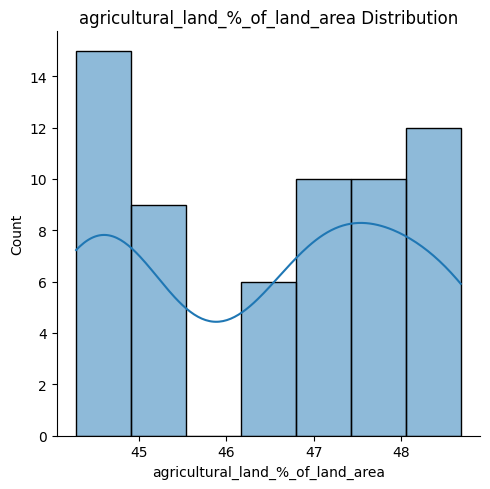

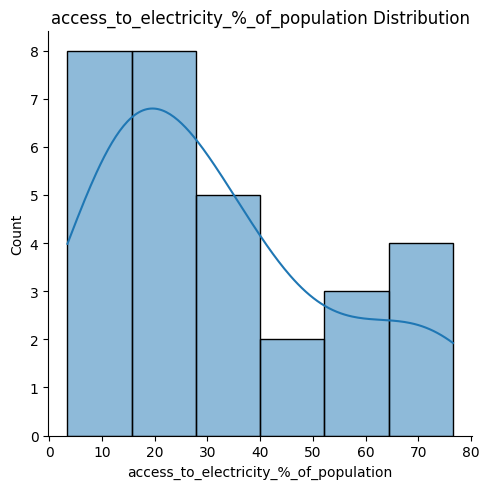

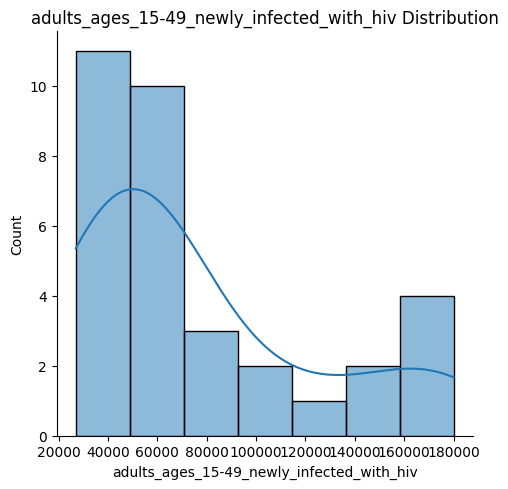

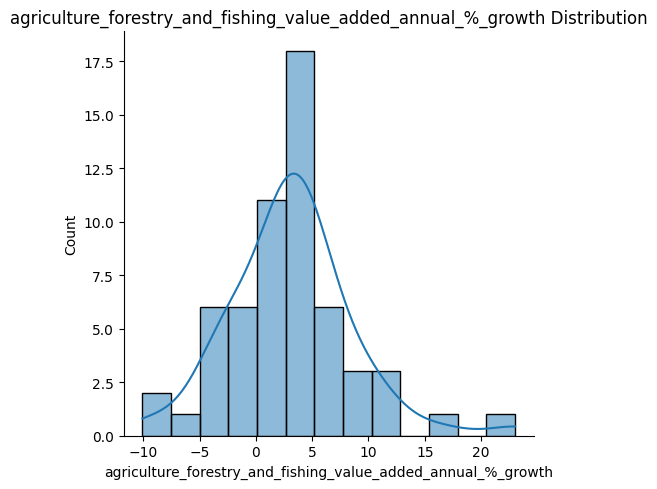

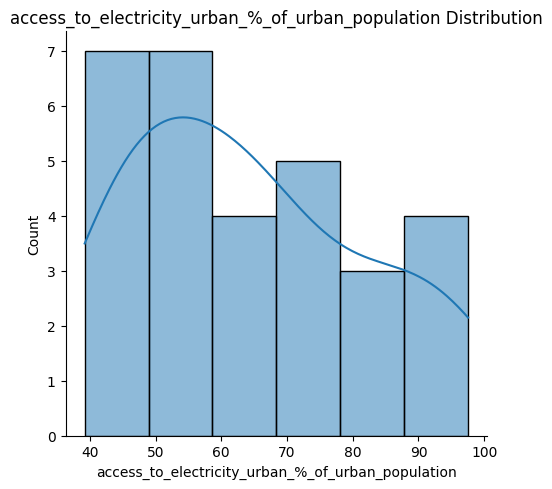

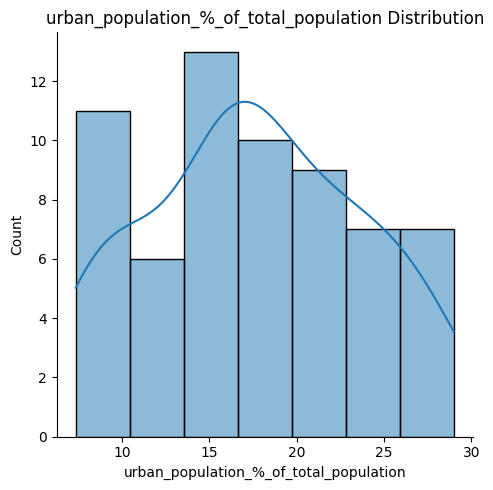

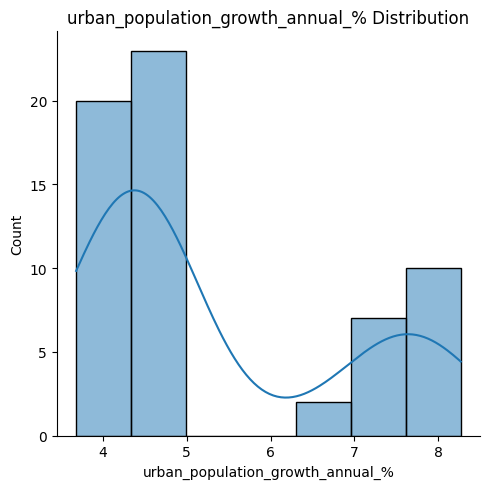

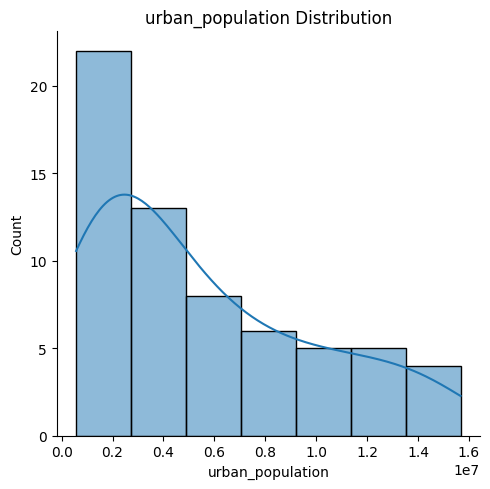

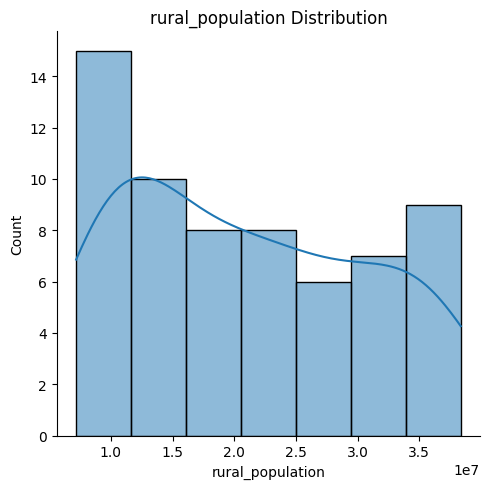

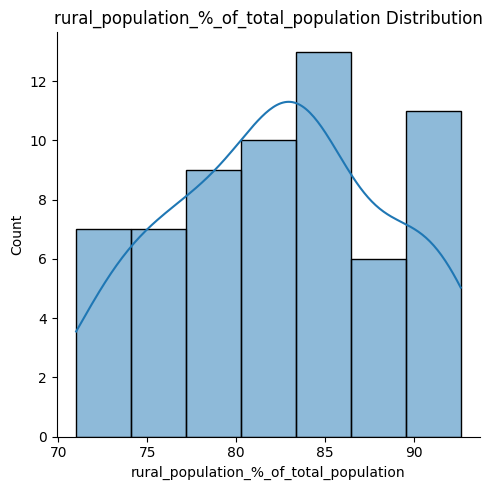

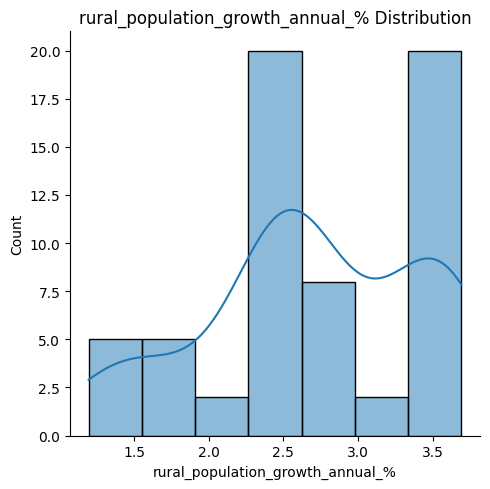

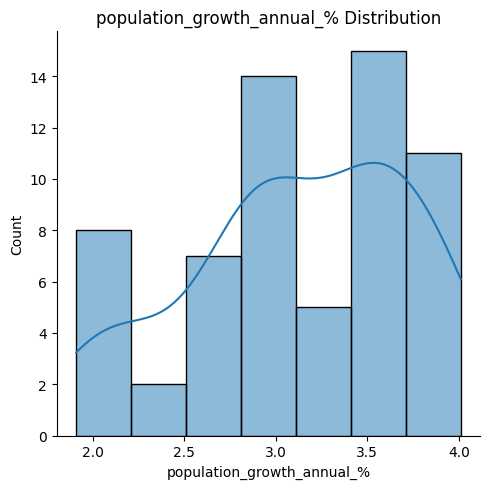

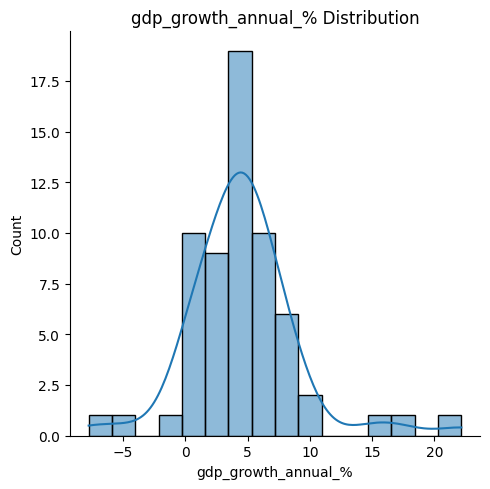

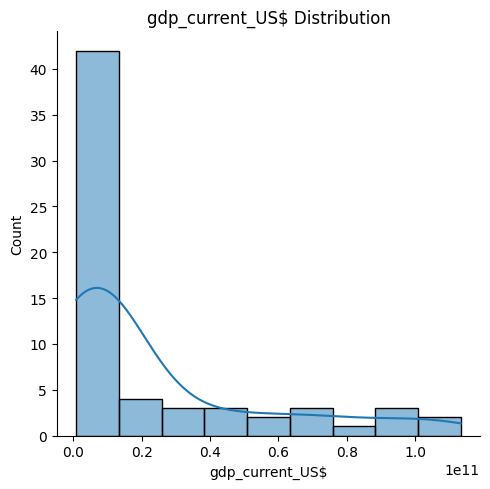

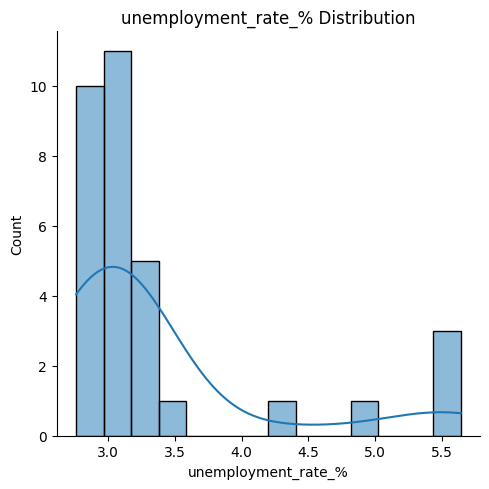

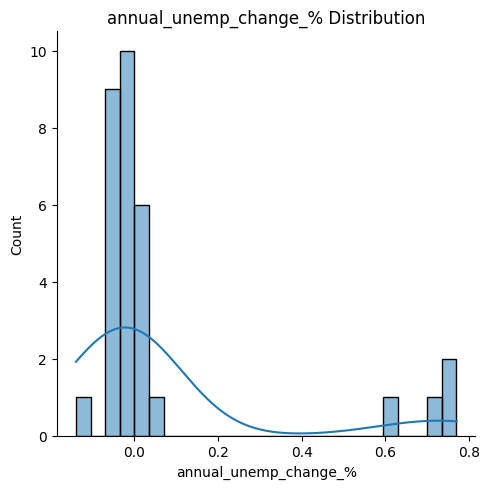

In [ ]:
numeric_cols = df.select_dtypes(include=['int', 'float'])

# plotting the distribution of numeric columns
plt.figure(figsize=(15,30))
for idx, col in enumerate(numeric_cols):
    sns.displot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")
    plt.tight_layout()

### Observations
Most of the variables do not exhibit a uniform distribution. The variables that show a normal distribution are:
* `gdp_growth_annual_%`
* `agriculture_forestry_and_fishing_value_added_annual_%_growth`

The rest of the variables do not show a uniform distribution.

In [ ]:
# summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
agricultural_land_%_of_land_area,62.0,4.645818e+01,1.636206e+00,4.427733e+01,4.493358e+01,4.685403e+01,4.776461e+01,4.868749e+01
access_to_electricity_%_of_population,30.0,3.207086e+01,2.209419e+01,3.473437e+00,1.538177e+01,2.547228e+01,4.122304e+01,7.654245e+01
adults_ages_15-49_newly_infected_with_hiv,33.0,7.603030e+04,4.863865e+04,2.700000e+04,4.000000e+04,5.900000e+04,9.400000e+04,1.800000e+05
agriculture_forestry_and_fishing_value_added_annual_%_growth,58.0,3.156977e+00,5.477254e+00,-1.007319e+01,3.441316e-03,2.900452e+00,5.048577e+00,2.302879e+01
access_to_electricity_urban_%_of_urban_population,30.0,6.436233e+01,1.794095e+01,3.922034e+01,4.995505e+01,6.112527e+01,7.681404e+01,9.754800e+01
urban_population_%_of_total_population,63.0,1.760746e+01,6.077777e+00,7.362000e+00,1.320850e+01,1.704300e+01,2.223250e+01,2.900200e+01
urban_population_growth_annual_%,62.0,5.342980e+00,1.546289e+00,3.680144e+00,4.265542e+00,4.656071e+00,7.278262e+00,8.270608e+00
urban_population,63.0,5.470449e+06,4.375918e+06,5.706610e+05,1.833618e+06,4.076385e+06,8.334010e+06,1.566905e+07
rural_population,63.0,2.089601e+07,9.781360e+06,7.180774e+06,1.204347e+07,1.984185e+07,2.914701e+07,3.835844e+07
rural_population_%_of_total_population,63.0,8.239254e+01,6.077777e+00,7.099800e+01,7.776750e+01,8.295700e+01,8.679150e+01,9.263800e+01


#### Observations:
* Throughout the study period, averagely 46.45 % of land in Kenya is being used for agriculture.
* The mean change in population growth is 3.13 %.
* During the study period, only 32 % of the population have managed to access electricity. This figure is lowered by the fact that in the earlier years of Kenya's independence a very small percentage of the population had access to electricity.
* During the study period, the standard deviation of the proportion of the population that is urban population is at 6.077 with the maximum value at 29.00 % and the minimum value at 7.36 %. This shows that the data is moderately tightly clustered around the mean.
* The proportion of the population that is rural has a standard deviation of 6.077, which is similar to that of the proportion of the population that is urban. Its maximum value is 92.63 % with the minimum being at 82.39 %.

## 4.2 How do these variables vary over time?
> Inspect the trend of the data over time.

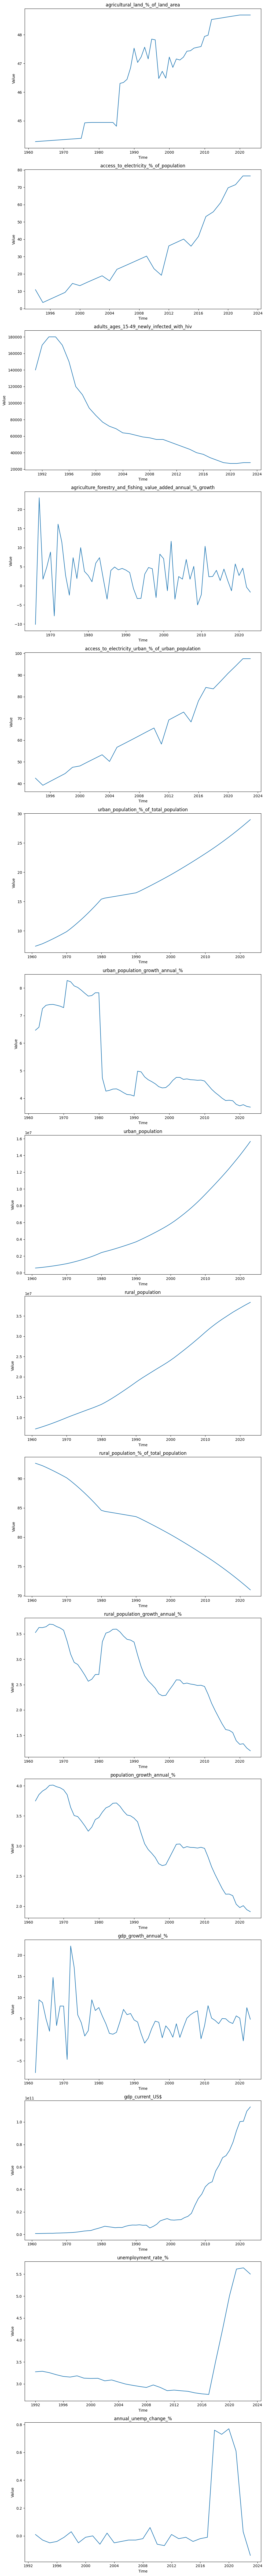

In [ ]:
# Create subplots for each variable
variables_to_plot = df.columns[1:]  # Exclude 'time'
num_variables = len(variables_to_plot)

fig, axes = plt.subplots(nrows=num_variables, ncols=1, figsize=(10, 6*num_variables))

for i, variable in enumerate(variables_to_plot):
    ax = axes[i]
    ax.plot(df['time'], df[variable])
    ax.set_title(variable)
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 4.3 